## 1 导包&载入数据

In [1]:
import pandas as pd
import re
import math
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
# 忽略不必要的warnings
warnings.filterwarnings('ignore')

# nltk：文本处理的包
import nltk
from nltk.stem.wordnet import WordNetLemmatizer # 词性还原
from nltk.corpus import wordnet as wn
from collections import Counter

import pyecharts.options as opts
from pyecharts.charts import WordCloud


%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
#plt.rcParams['font.sans-serif'] = ['SimHei'] # windows系统用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


- 加载数据

In [3]:
df_reviews=pd.read_csv('data/reviews.csv')
df_reviews.head()

,stars,date,type,short_d,content,product_name,name
0,2.0 out of 5 stars,"Reviewed in the United States on June 24, 2020",Rainbow String,For children,"This is for children, not adults. I cannot use...",everjoys-Soprano,Kathy
1,1.0 out of 5 stars,"Reviewed in the United States on June 24, 2020",Rainbow String,Returned.,Impossible to tune.,everjoys-Soprano,Pam Palumbo
2,4.0 out of 5 stars,"Reviewed in the United States on June 22, 2020",Mahogany,Nice,Very nice product! The ukulele is very light a...,everjoys-Soprano,andy
3,5.0 out of 5 stars,"Reviewed in the United States on June 20, 2020",Rainbow String,Buy it,It was a great guitar for beginning guitar pla...,everjoys-Soprano,Donna
4,2.0 out of 5 stars,"Reviewed in the United States on June 18, 2020",Rainbow String,Wouldn't hold a tune,"It is a cute little ukulele, but is poor quali...",everjoys-Soprano,Amazon Customer


- 查看数据情况

In [4]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5077 entries, 0 to 5076
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   stars         5077 non-null   object
 1   date          5077 non-null   object
 2   type          5077 non-null   object
 3   short_d       5075 non-null   object
 4   content       5076 non-null   object
 5   product_name  5077 non-null   object
 6   name          5061 non-null   object
dtypes: object(7)
memory usage: 277.8+ KB


## 2 数据处理

In [8]:
float('2.0')

2.0

In [10]:
'Reviewed in the United States on June 24, 2020'.split('on ')[1]

'June 24, 2020'

In [11]:
'June 24, 2020'.split(', ')

['June 24', '2020']

In [12]:
'June 24'.split(' ')

['June', '24']

In [13]:
# 对于评论内容空缺的，直接删除
df_reviews = df_reviews.dropna()

# 截取评论中的星级数据 
def get_stars(n):
    return float(n.replace(' out of 5 stars',''))

# 根据评星数量获取评价属性， 好评（4分及以上）， 中评（3分）， 差评（2分及以下）
def stars_cat(n):
    '''
    评分转换为好中差评  1分2分为差评, 3分中评, 4分5分好评
    '''
    if n<=2:
        return '差评'  
    elif n ==3:
        return '中评' 
    else:
        return '好评'

# 获取评论中的日期信息，转换成日期时间格式
def get_date(x):
    '''
    处理评论日期  Reviewed in the United States on June 24, 2020
    先用 'on ' 去拆分, 把日期文本拆分成两部分
    再用', '拆分, 把后面的部分拆分成 ['月 日','年']
    最后把前面的'月 日' 用空格拆分成 月 日
    '''
    x = x.split('on ')[1] # 把数据拆分成两部分 ['Reviewed in the United States on ','June 24, 2020']
    x = x.split(', ') 
    y= x[1]
    x = x[0].split(' ')
    m,d = x[0],x[1]
    if m=='January' or m=='Jan':
        on_date='01-'+d+'-'+y
    elif m=='February' or m=='Feb':
        on_date='02-'+d+'-'+y
    elif m=='March' or m=='Mar':
        on_date='03-'+d+'-'+y
    elif  m=='April' or m=='Apr':
        on_date='04-'+d+'-'+y
    elif  m=='May':
        on_date='05-'+d+'-'+y
    elif  m=='June' or m=='Jun':
        on_date='06-'+d+'-'+y
    elif  m=='July' or m=='Jul':
        on_date='07-'+d+'-'+y
    elif m=='August' or m=='Aug':
        on_date='08-'+d+'-'+y
    elif m=='September' or m=='Sep':
        on_date='09-'+d+'-'+y
    elif m=='October' or m=='Oct':
        on_date='10-'+d+'-'+y
    elif m=='November' or m=='Nov':
        on_date='11-'+d+'-'+y
    elif m=='December' or m=='Dec':
        on_date='12-'+d+'-'+y    
    on_date=datetime.datetime.strptime(on_date, '%m-%d-%Y').strftime('%Y-%m-%d')
    return on_date

# 字数统计
df_reviews['stars_num']=df_reviews['stars'].apply(get_stars)
df_reviews['content_cat']=df_reviews['stars_num'].apply(stars_cat)
df_reviews['date_d']=df_reviews['date'].apply(get_date)

In [14]:
df_reviews

,stars,date,type,short_d,content,product_name,name,stars_num,content_cat,date_d
0,2.0 out of 5 stars,"Reviewed in the United States on June 24, 2020",Rainbow String,For children,"This is for children, not adults. I cannot use...",everjoys-Soprano,Kathy,2.0,差评,2020-06-24
1,1.0 out of 5 stars,"Reviewed in the United States on June 24, 2020",Rainbow String,Returned.,Impossible to tune.,everjoys-Soprano,Pam Palumbo,1.0,差评,2020-06-24
2,4.0 out of 5 stars,"Reviewed in the United States on June 22, 2020",Mahogany,Nice,Very nice product! The ukulele is very light a...,everjoys-Soprano,andy,4.0,好评,2020-06-22
3,5.0 out of 5 stars,"Reviewed in the United States on June 20, 2020",Rainbow String,Buy it,It was a great guitar for beginning guitar pla...,everjoys-Soprano,Donna,5.0,好评,2020-06-20
4,2.0 out of 5 stars,"Reviewed in the United States on June 18, 2020",Rainbow String,Wouldn't hold a tune,"It is a cute little ukulele, but is poor quali...",everjoys-Soprano,Amazon Customer,2.0,差评,2020-06-18
...,...,...,...,...,...,...,...,...,...,...
5072,1.0 out of 5 stars,"Reviewed in the United States on December 1, 2017",Tenor,... bridge is to low causing the strings to ra...,The product arrived with the Fretboard cracked...,donner,Addm,1.0,差评,2017-12-01
5073,5.0 out of 5 stars,"Reviewed in the United States on December 1, 2017",Tenor,Good Value,Good finishing. Wish the bag's zipper went al...,donner,John,5.0,好评,2017-12-01
5074,5.0 out of 5 stars,"Reviewed in the United States on November 30, ...",Soprano,Five Stars,Very happy with the quality of it.,donner,Salvador Ruiz,5.0,好评,2017-11-30
5075,5.0 out of 5 stars,"Reviewed in the United States on November 30, ...",Concert,Five Stars,I like the looks of the ukulele and the tone.,donner,Amazon Customer,5.0,好评,2017-11-30


## 3 非文本数据的分析

<AxesSubplot:>

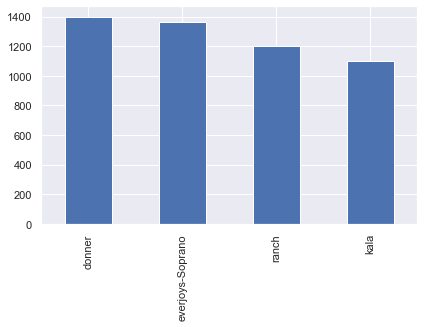

In [15]:
# 查看不同商品的总数
sns.set(font_scale=1)
df_reviews['product_name'].value_counts().plot(kind='bar')

In [16]:
df_reviews['product_name'].value_counts()

donner              1399
everjoys-Soprano    1362
ranch               1199
kala                1099
Name: product_name, dtype: int64

In [17]:
# 按时间顺序统计发文数量，分析是否有周期性规律
df_reviews['date_d'] = pd.to_datetime(df_reviews['date_d'])
df_reviews['y_m'] = df_reviews['date_d'].astype('datetime64[M]')#提取日期年月
df_reviews.head()

,stars,date,type,short_d,content,product_name,name,stars_num,content_cat,date_d,y_m
0,2.0 out of 5 stars,"Reviewed in the United States on June 24, 2020",Rainbow String,For children,"This is for children, not adults. I cannot use...",everjoys-Soprano,Kathy,2.0,差评,2020-06-24,2020-06-01
1,1.0 out of 5 stars,"Reviewed in the United States on June 24, 2020",Rainbow String,Returned.,Impossible to tune.,everjoys-Soprano,Pam Palumbo,1.0,差评,2020-06-24,2020-06-01
2,4.0 out of 5 stars,"Reviewed in the United States on June 22, 2020",Mahogany,Nice,Very nice product! The ukulele is very light a...,everjoys-Soprano,andy,4.0,好评,2020-06-22,2020-06-01
3,5.0 out of 5 stars,"Reviewed in the United States on June 20, 2020",Rainbow String,Buy it,It was a great guitar for beginning guitar pla...,everjoys-Soprano,Donna,5.0,好评,2020-06-20,2020-06-01
4,2.0 out of 5 stars,"Reviewed in the United States on June 18, 2020",Rainbow String,Wouldn't hold a tune,"It is a cute little ukulele, but is poor quali...",everjoys-Soprano,Amazon Customer,2.0,差评,2020-06-18,2020-06-01


In [19]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

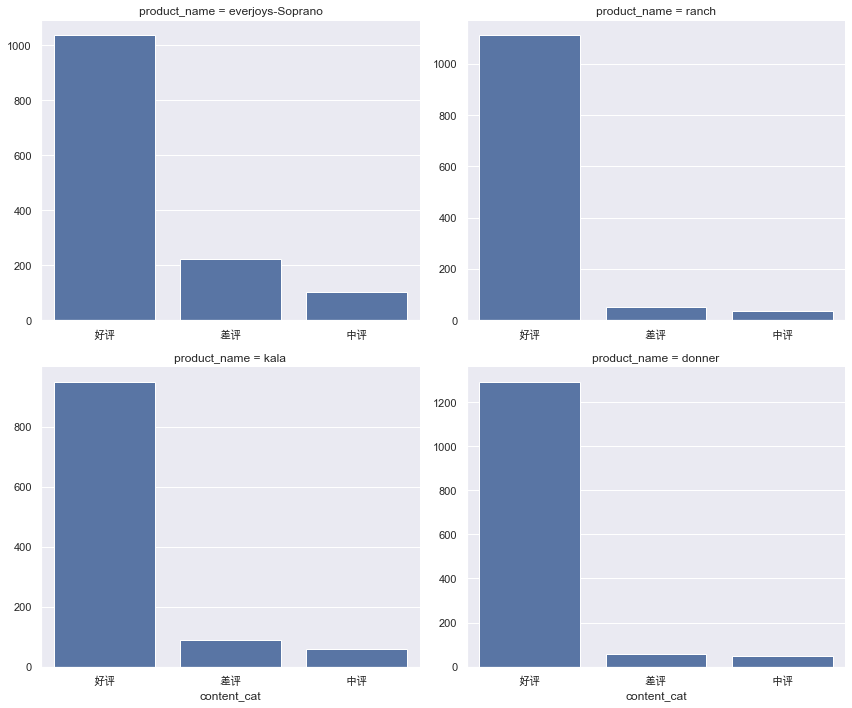

In [20]:
g = sns.FacetGrid(data = df_reviews,col = 'product_name',col_wrap = 2,sharex=False,sharey=False,height = 5, aspect= 1.2)
# g.map 绘制分面图中的小图，利用 sns.countplot 绘图  , 从df_reviews 利用 product_name分组  每组画 content_cat 不同类别的数量order 指定柱子的顺序
g.map(sns.countplot,'content_cat',order=['好评','差评','中评'])

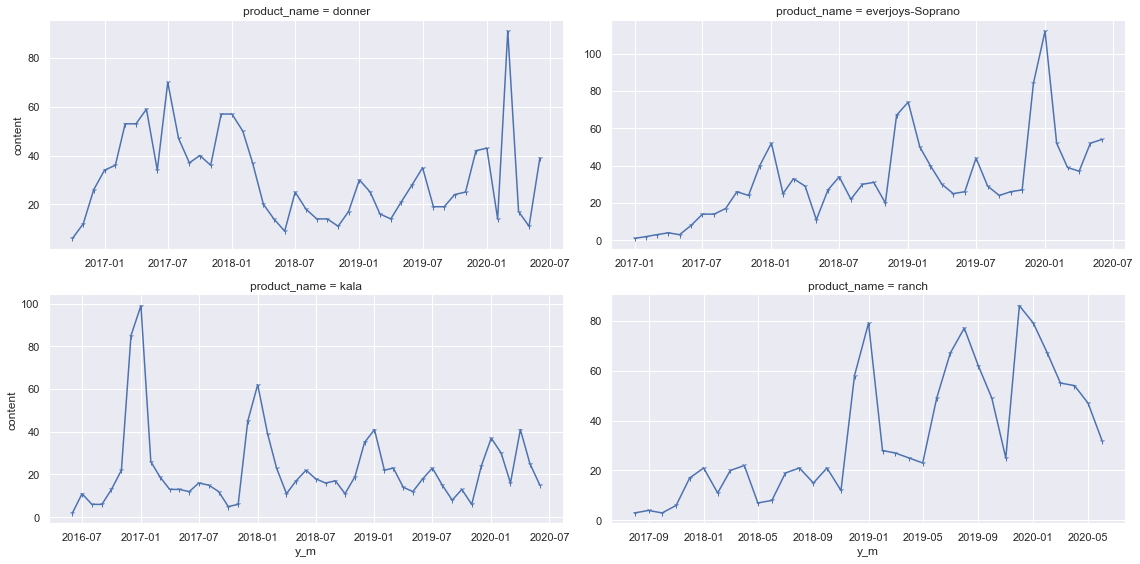

In [21]:
# 每种产品的发文数量按月统计
df_content=df_reviews.groupby(['product_name','y_m'])['content'].count().reset_index()
g=sns.FacetGrid(data=df_content,col='product_name',col_wrap=2,sharey=False,sharex=False,height=4,aspect =2)
# 第一个参数传入的是 要调用哪个API 绘图,  后面几个参数传的是 调用 (plt.plot 的时候需要用到哪些参数, 具体的数据传入列名就行了
g.map(plt.plot,"y_m",'content',marker='1')#marker='1' 折线图每一个点会一条短线来表示

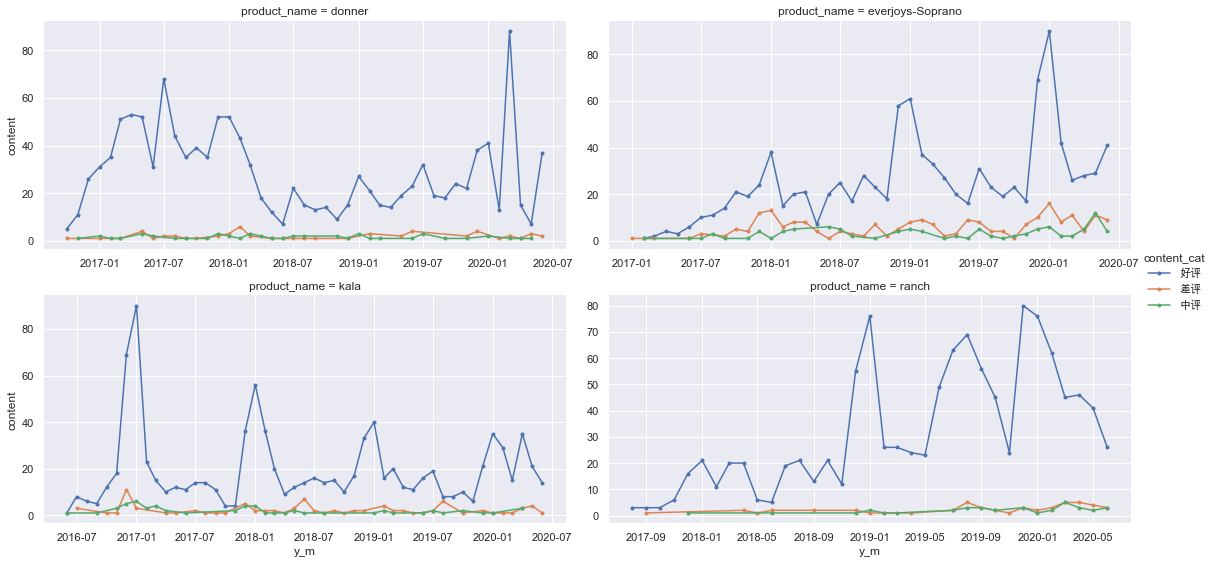

In [22]:
# 好中差评的随时间分布
df_content=df_reviews.groupby(['product_name','y_m','content_cat'])['content'].count().reset_index()
g=sns.FacetGrid(data=df_content,col='product_name',hue='content_cat',col_wrap=2,sharey=False,sharex=False,height=4,aspect =2)
g.map(plt.plot,"y_m",'content',marker='.')#marker='.' 折线图每一个点会用一个点来表示
g.add_legend()# 添加图例

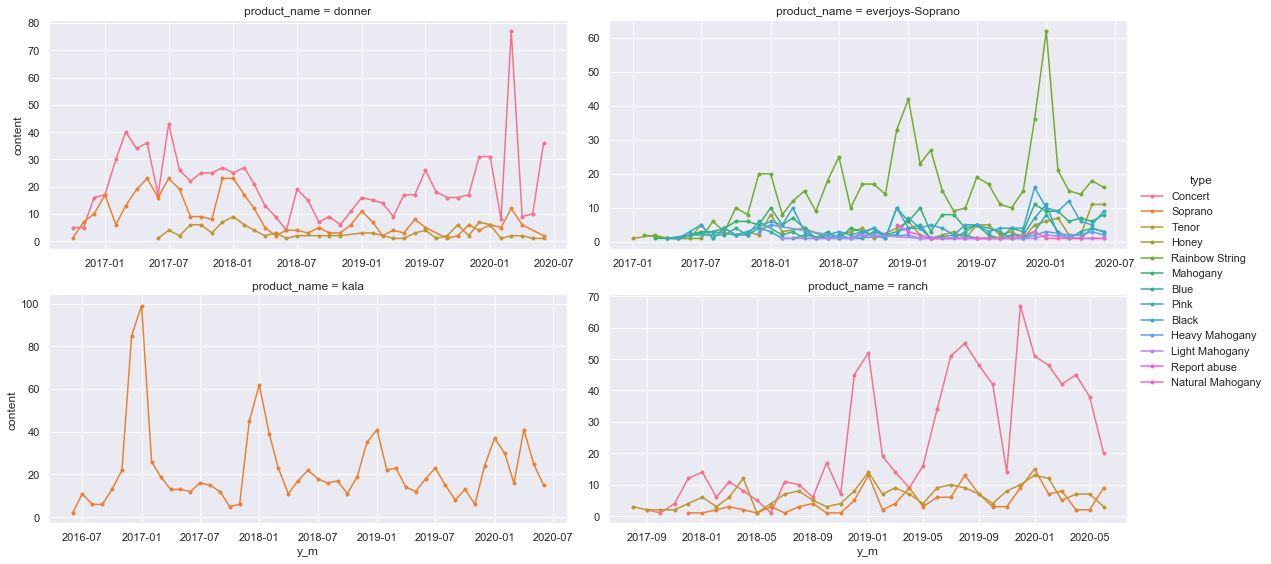

In [23]:
# 同产品不同型号的分布
df_content=df_reviews.groupby(['product_name','y_m','type'])['content'].count().reset_index()
g=sns.FacetGrid(data=df_content,col='product_name',hue='type',col_wrap=2,sharey=False,sharex=False,height=4,aspect =2)
g.map(plt.plot,"y_m",'content',marker='.')
g.add_legend()

## 4 文本挖掘

- 数据去重

- 判断某款产品是好评还是差评

- 还原常见缩写单词

- 词形还原(Lemmatization)

- 我们将上述处理封装成方法

## 5 创建词云图

- 创建方法，统计单词总数

- 查看每条评论的词汇数量和词汇丰富度

- 统计出现最多的单词的词频,准备绘制词云图

- 绘制好评词云图

- 绘制差评词云图